In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('exams.csv')
df

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   gender                  1000 non-null   object
 1   race/ethnicity          1000 non-null   object
 2   parent_education_level  1000 non-null   object
 3   lunch                   1000 non-null   object
 4   test_prep_course        1000 non-null   object
 5   math                    1000 non-null   int64 
 6   reading                 1000 non-null   int64 
 7   writing                 1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [5]:
df['parent_education_level'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [6]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [7]:
df['test_prep_course'].unique()

array(['none', 'completed'], dtype=object)

In [8]:
df.describe()

,math,reading,writing
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
df.columns

Index(['gender', 'race/ethnicity', 'parent_education_level', 'lunch',
       'test_prep_course', 'math', 'reading', 'writing'],
      dtype='object')

In [10]:
df

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

1. What are the average reading scores for students with/without the test preparation course?


In [12]:
Reading_average=df.groupby('test_prep_course')[['reading']].mean()
Reading_average

,reading
test_prep_course,
completed,73.893855
none,66.534268


2. What are the average scores for the different parental education levels?


In [13]:
average_score=df.groupby(['parent_education_level',]).mean(numeric_only=True)
average_score

,math,reading,writing
parent_education_level,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


3. Create plots to visualize findings for questions 1 and 2.


Text(0, 0.5, 'Average Scores')

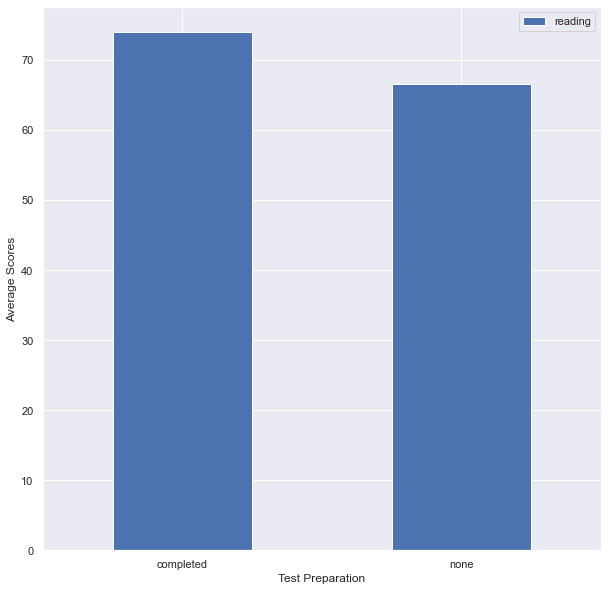

In [14]:
first_visual=Reading_average.plot(kind='bar',figsize=(10,10),rot=0)

first_visual.set_xlabel('Test Preparation')
first_visual.set_ylabel('Average Scores')

Text(0, 0.5, 'Average Scores')

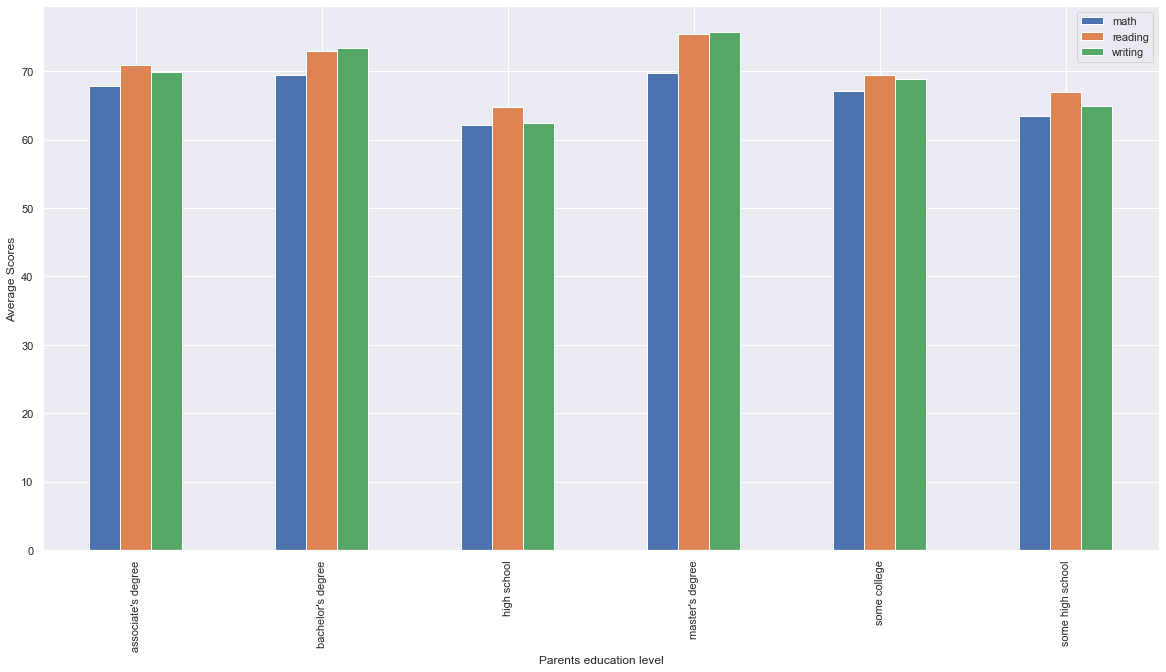

In [15]:
second_visual=average_score.plot(kind='bar',figsize=(20,10))

second_visual.set_xlabel('Parents education level')
second_visual.set_ylabel('Average Scores')

4. [Optional] Look at the effects within subgroups. Compare the average scores for students with/without the test preparation course for different parental education levels (e.g., faceted plots).


In [16]:
Next=df.groupby(['parent_education_level','test_prep_course']).mean(numeric_only=True)
Next

math    reading    writing
parent_education_level test_prep_course                                 
associate's degree     completed         71.829268  76.170732  76.817073
                       none              65.571429  67.857143  65.842857
bachelor's degree      completed         73.282609  76.739130  78.695652
                       none              66.902778  70.611111  69.986111
high school            completed         65.000000  67.839286  68.053571
                       none              60.992857  63.450000  60.207143
master's degree        completed         70.600000  78.250000  80.100000
                       none              69.307692  73.897436  73.410256
some college           completed         71.454545  75.987013  76.519481
                       none              64.892617  66.087248  64.872483
some high school       completed         66.701299  70.948052  70.363636
                       none              61.078431  63.911765  60.754902

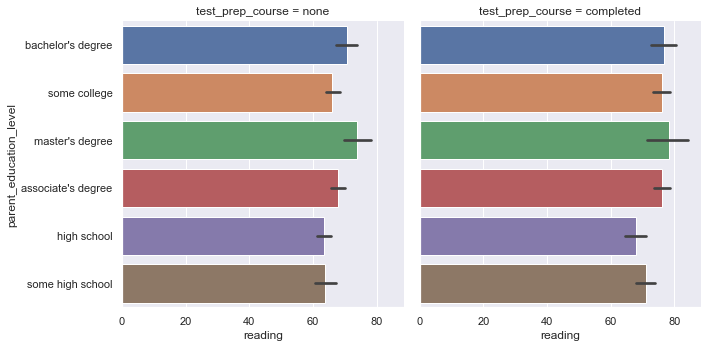

In [17]:
sns.catplot(x='reading', y='parent_education_level', col='test_prep_course', data=df, kind='bar');

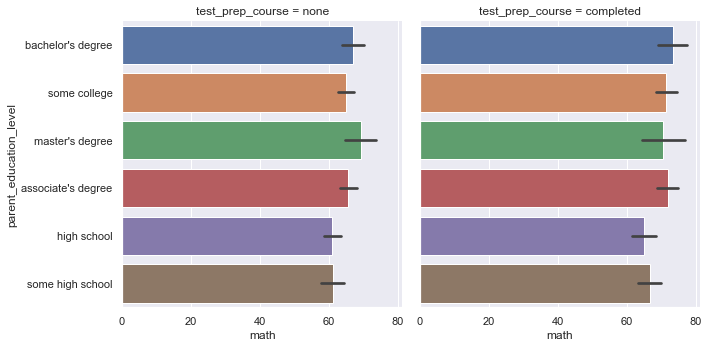

In [18]:
sns.catplot(x='math', y='parent_education_level', col='test_prep_course', data=df, kind='bar');

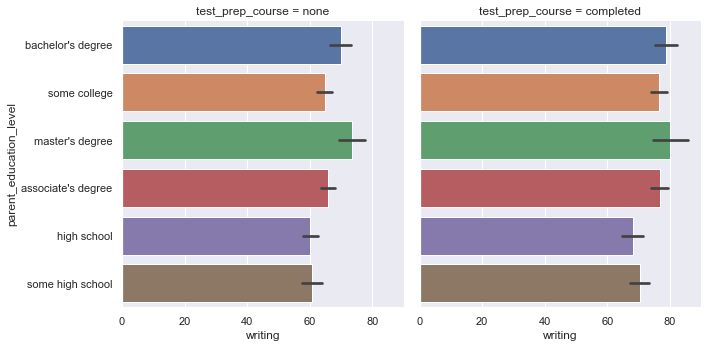

In [19]:
sns.catplot(x='writing', y='parent_education_level', col='test_prep_course', data=df, kind='bar');

5. [Optional 2] The principal wants to know if kids who perform well on one subject also score well on the others. Look at the correlations between scores

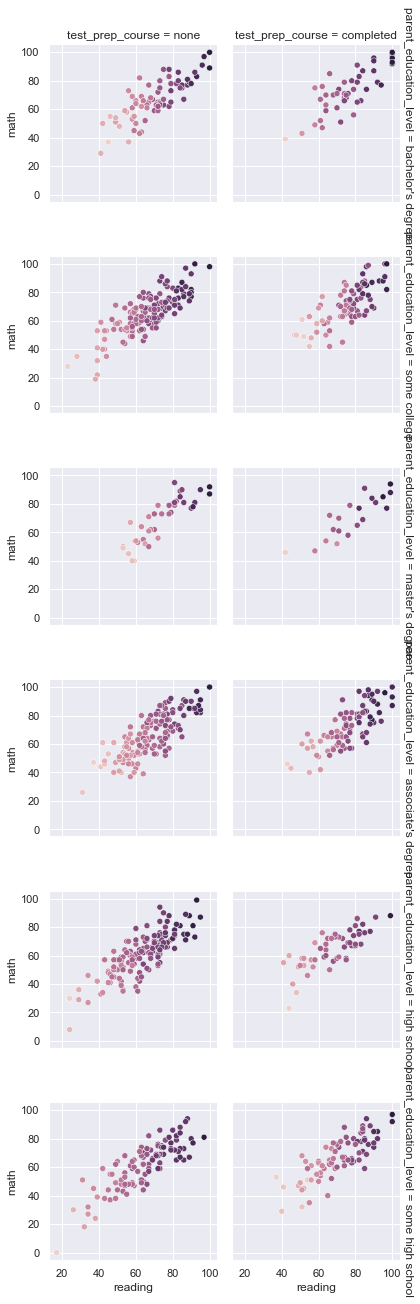

In [20]:
g=sns.FacetGrid(data=df,col='test_prep_course',row='parent_education_level',margin_titles=True)
g.map(sns.scatterplot,'reading','math','writing');

In [21]:
corr=df[['math','reading','writing']].corr()
corr

,math,reading,writing
math,1.000000,0.817580,0.802642
reading,0.817580,1.000000,0.954598
writing,0.802642,0.954598,1.000000


6. summarize your findings.

--students that completed their exam prepartion had better scores than students who did not.Their parent's level of education also played a positive role in the students exam score.-- 